# Import data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)
input_path = "2017_2018_2019_merged.csv"
main_data = pd.read_csv(input_path) 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (3690, 52)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [3]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (2583, 51)
Testing shape:  (1107, 51)


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


In [5]:
display(init_train.describe())
display(init_train_label.describe())


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,...,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.104576,0.169218,0.039954,0.039926,0.028599,-0.119837,0.000693,0.059141,0.045652,0.000317,...,0.087317,-0.020159,0.192091,-0.009137,-0.016856,0.054146,0.039799,0.097402,0.083086,0.000623
std,3.351245,6.527943,1.346680,2.301105,3.212774,4.930630,0.035950,2.686174,2.348888,0.040516,...,3.279896,2.421643,6.848288,1.442044,1.454028,2.028213,1.652121,3.556078,3.081653,0.033965
min,-12.710000,-23.930000,-5.430000,-9.670000,-24.700000,-35.330000,-0.220000,-16.000000,-10.000000,-0.320000,...,-10.000000,-8.170000,-48.000000,-9.000000,-9.700000,-13.000000,-10.100000,-25.000000,-27.400000,-0.220000
25%,-1.855000,-3.870000,-0.720000,-1.305000,-1.765000,-3.170000,-0.020000,-1.630000,-1.370000,-0.020000,...,-2.125000,-1.570000,-4.235000,-0.920000,-0.920000,-1.150000,-0.965000,-2.025000,-1.750000,-0.020000
50%,0.130000,0.240000,0.020000,0.060000,0.070000,-0.070000,0.000000,0.070000,0.040000,0.000000,...,0.000000,0.010000,0.100000,0.000000,0.000000,0.020000,0.030000,0.120000,0.070000,0.000000
75%,2.020000,4.170000,0.770000,1.315000,1.770000,2.930000,0.020000,1.745000,1.475000,0.020000,...,2.305000,1.560000,4.640000,0.900000,0.900000,1.310000,1.035000,2.290000,1.880000,0.020000
max,14.000000,33.000000,10.000000,16.050000,24.500000,48.600000,0.270000,22.000000,9.000000,0.350000,...,11.000000,10.000000,28.000000,10.000000,10.100000,13.000000,11.600000,29.000000,34.200000,0.200000


,ttl_pts
count,2583.000000
mean,215.385985
std,20.488819
min,155.000000
25%,201.000000
50%,215.000000
75%,229.000000
max,301.000000


# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [7]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,2583.000000,2.583000e+03,2583.000000,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,...,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03,2583.000000,2.583000e+03,2.583000e+03,2.583000e+03,2.583000e+03
mean,0.000000,-9.627950e-18,0.000000,-1.650506e-17,8.252529e-18,5.501686e-18,-1.100337e-17,5.501686e-18,1.719277e-17,-4.126264e-18,...,5.501686e-18,6.189397e-18,1.616120e-17,1.788048e-17,-2.475759e-17,0.000000,2.063132e-17,-1.237879e-17,6.877107e-18,-1.512964e-17
std,1.000194,1.000194e+00,1.000194,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,...,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00,1.000194,1.000194e+00,1.000194e+00,1.000194e+00,1.000194e+00
min,-3.824566,-3.692417e+00,-4.062593,-4.220497e+00,-7.698451e+00,-7.142491e+00,-6.140006e+00,-5.979602e+00,-4.277598e+00,-7.907418e+00,...,-3.076094e+00,-3.366069e+00,-7.038463e+00,-6.236013e+00,-6.660822e+00,-6.437526,-6.138631e+00,-7.058974e+00,-8.920021e+00,-6.496814e+00
25%,-0.584844,-6.188780e-01,-0.564426,-5.845830e-01,-5.583790e-01,-6.187350e-01,-5.757097e-01,-6.289495e-01,-6.028072e-01,-5.015607e-01,...,-6.746389e-01,-6.401196e-01,-6.465774e-01,-6.317698e-01,-6.212527e-01,-0.593813,-6.083048e-01,-5.969535e-01,-5.949536e-01,-6.073057e-01
50%,0.007588,1.084503e-02,-0.014820,8.725131e-03,1.288901e-02,1.010967e-02,-1.928008e-02,4.043509e-03,-2.406857e-03,-7.836886e-03,...,-2.662706e-02,1.245624e-02,-1.344985e-02,6.337139e-03,1.159513e-02,-0.016839,-5.932120e-03,6.355915e-03,-4.247102e-03,-1.835484e-02
75%,0.571667,6.129889e-01,0.542213,5.542208e-01,5.421291e-01,6.186690e-01,5.371495e-01,6.277278e-01,6.086389e-01,4.858869e-01,...,6.762752e-01,6.526414e-01,6.496180e-01,6.305721e-01,6.306853e-01,0.619312,6.024946e-01,6.166969e-01,5.832138e-01,5.705960e-01
max,4.147149,5.030243e+00,7.397432,6.958906e+00,7.618381e+00,9.882971e+00,7.492519e+00,8.169653e+00,3.812903e+00,8.632330e+00,...,3.327787e+00,4.138553e+00,4.061350e+00,6.942282e+00,6.959163e+00,6.384122,6.998543e+00,8.129235e+00,1.107312e+01,5.871154e+00


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
3176,-1.117585,-0.778224,-1.054615,-1.038801,-1.602850,0.531442,-1.132139,-0.874700,-0.760359,-1.735870,...,0.089253,-0.260139,-0.875146,1.095280,1.029655,-0.031633,-0.090688,-1.588406,-1.902947,-0.901781
3415,-0.553506,0.213092,0.089160,-0.021701,0.937503,-1.150210,-0.575710,-1.481628,0.742771,-0.007837,...,-0.773747,-0.161013,-0.864922,0.464109,0.603170,0.303702,0.593414,-0.362099,0.054174,-0.018355
1235,-1.225028,-1.266987,2.941169,3.981499,2.108057,-0.949386,-2.244998,-0.394370,-3.851782,-3.957627,...,-0.026627,-3.295856,0.702196,1.393526,1.318563,-3.971824,-4.322432,1.097657,1.271290,-1.196257
2610,-0.308774,0.651293,-1.388834,-1.151812,2.655977,0.841807,-0.853924,-1.664079,-1.126561,-0.748423,...,0.503980,0.421349,-1.307454,-0.236421,-0.291071,1.876820,2.312749,-0.533669,0.495581,-0.312830
1459,0.407517,-0.018266,-0.163362,0.108696,-2.365578,2.367263,0.815364,0.942363,0.027400,1.473335,...,0.769284,0.652641,0.177876,0.491853,0.355534,1.122315,1.223029,-1.743101,-1.821806,0.276121


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

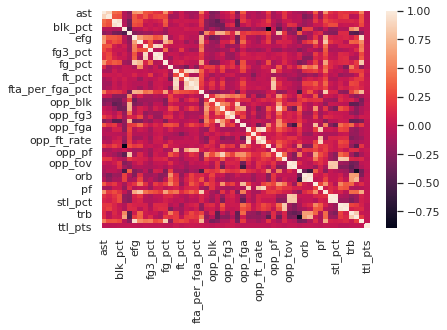

In [8]:
def plot_correlation_heatmap(input, labels, ax=None):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax)
plot_correlation_heatmap(scaled_train, init_train_label)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,def_rtg,fg3,fg3a_per_fga_pct,ft,ft_rt,fta,fta_per_fga_pct,off_rtg,opp_efg_pct,opp_fg3,opp_fg3a,opp_pf,opp_tov,opp_trb,orb_pct,pts,stl,stl_pct,to_pct,ts_pct
3176,0.531442,-0.760359,0.408832,0.184436,0.249531,0.632844,0.772986,-1.276603,1.368600,0.257528,-0.244871,0.847350,1.934867,1.464430,-0.777340,-0.875146,1.095280,1.029655,-0.090688,-0.901781
3415,-1.150210,0.742771,0.966683,0.097462,0.494975,0.362127,0.184533,-0.615683,-0.325913,-1.271219,-1.440302,0.503430,0.341265,-0.517550,-0.541088,-0.864922,0.464109,0.603170,0.593414,-0.018355
1235,-0.949386,-3.851782,-2.101499,5.145126,3.931201,4.927884,3.715256,0.815731,2.724212,5.895597,3.733229,3.653741,4.212192,-1.239983,1.661469,0.702196,1.393526,1.318563,-4.322432,-1.196257
2610,0.841807,-1.126561,-0.427945,0.844787,1.231309,0.403776,0.969138,-1.671416,1.707503,-0.088727,0.598795,0.512601,-0.542316,-1.252547,-1.030818,-1.307454,-0.236421,-0.291071,2.312749,-0.312830
1459,2.367263,0.027400,-0.427945,-1.261896,-0.977693,-1.381919,-0.796224,-0.269570,1.368600,1.962668,2.017298,-0.629215,0.362303,1.131483,-0.799488,0.177876,0.491853,0.355534,1.223029,0.276121


,ast,def_rtg,fg,fg3,fg_pct,fga,fta_per_fga_pct,off_rtg,opp_ast,opp_fg_pct,opp_ft_pct,opp_ft_rate,opp_tov,opp_tov_pct,orb_pct,pts,stl,stl_pct,to,trb_pct
3176,-1.117585,0.531442,-0.874700,-0.760359,-0.683657,0.022191,0.772986,-1.276603,0.625079,1.141711,1.055700,0.984184,1.934867,1.705360,-0.777340,-0.875146,1.095280,1.029655,-0.031633,-1.902947
3415,-0.553506,-1.150210,-1.481628,0.742771,-1.018359,-1.480701,0.184533,-0.615683,-1.955243,0.011089,-0.015973,-0.241893,0.341265,0.588708,-0.541088,-0.864922,0.464109,0.603170,0.303702,0.054174
1235,-1.225028,-0.949386,-0.394370,-3.851782,-1.018359,1.166836,3.715256,0.815731,1.666190,1.141711,-1.355565,-3.920123,4.212192,4.160823,1.661469,0.702196,1.393526,1.318563,-3.971824,1.271290
2610,-0.308774,0.841807,-1.664079,-1.126561,-0.014254,-2.176808,0.969138,-1.671416,3.078835,2.272334,-1.355565,-0.487108,-0.542316,-0.299936,-1.030818,-1.307454,-0.236421,-0.291071,1.876820,0.495581
1459,0.407517,2.367263,0.942363,0.027400,0.989851,0.214422,-0.796224,-0.269570,1.784591,1.141711,0.519863,0.738969,0.362303,-0.095314,-0.799488,0.177876,0.491853,0.355534,1.122315,-1.821806


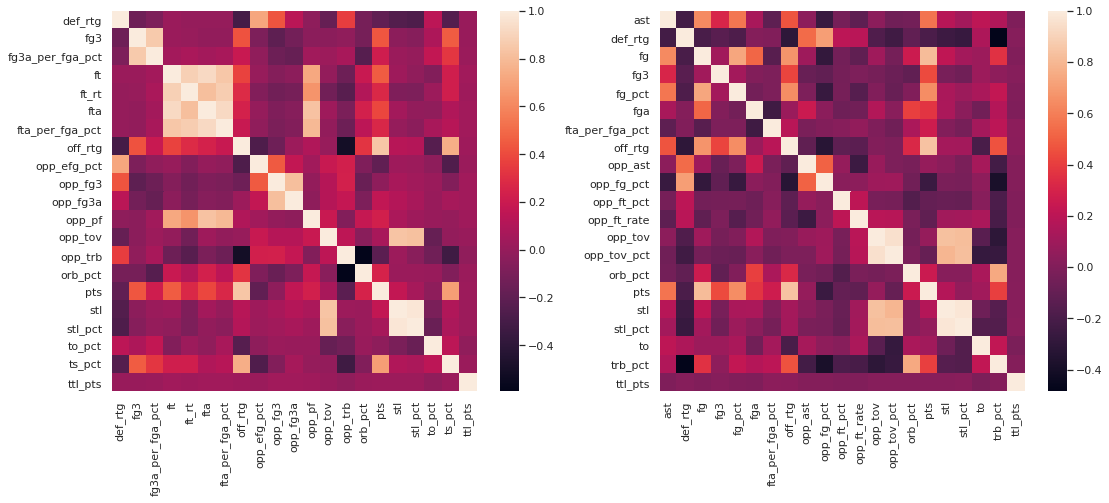

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [10]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

"Column diff {'ts_pct', 'fg3a_per_fga_pct', 'opp_tov_pct', 'fg_pct', 'to', 'opp_pf', 'fga', 'opp_ft_pct', 'fta', 'opp_fg3', 'opp_trb', 'to_pct', 'opp_fg3a', 'ast', 'fg', 'trb_pct', 'ft', 'opp_ast', 'opp_efg_pct', 'opp_ft_rate', 'ft_rt', 'opp_fg_pct'}"

# Feature Selection (Cont)
Notice how h_off_rg is highly correlated with many features. Same with h_def_rg

# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

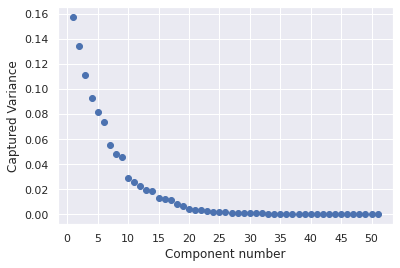

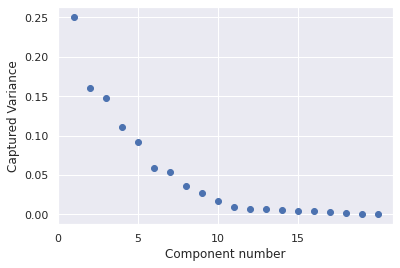

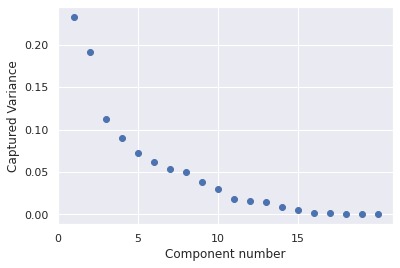

In [11]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, max_components=100):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
max_components = 20
pca_scree_plot(scaled_train, max_components = 100)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components)

# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

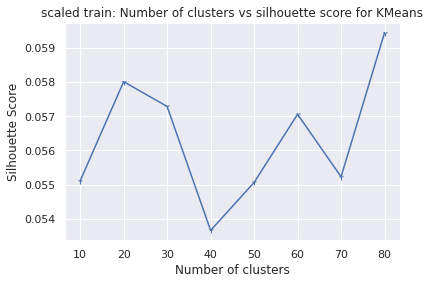

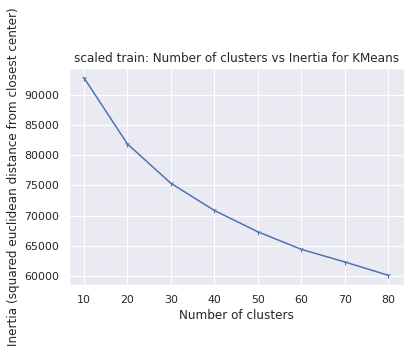

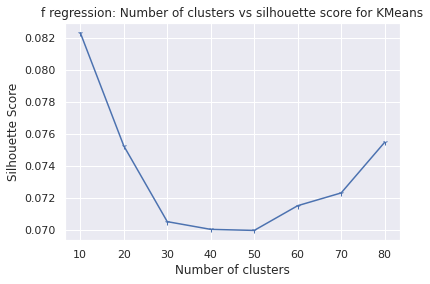

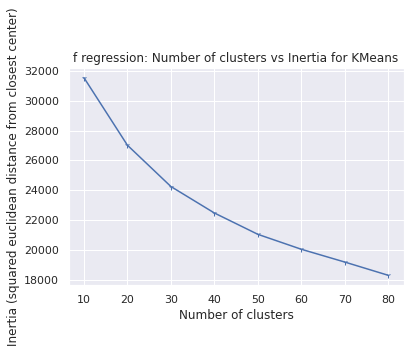

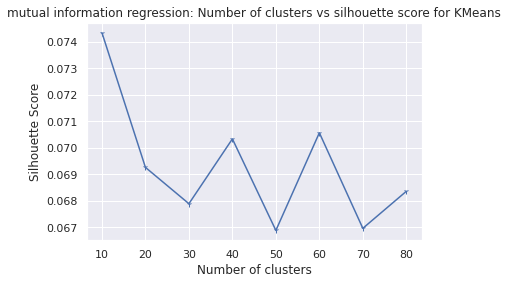

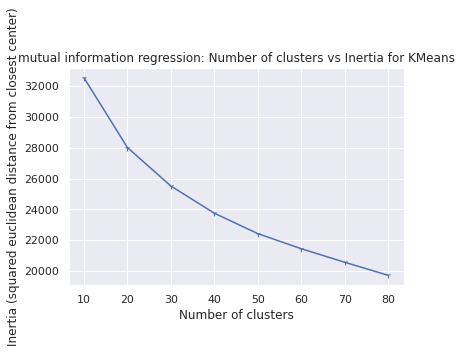

In [26]:
from sklearn.cluster import OPTICS, KMeans
from sklearn.metrics import silhouette_score

datasets = [("scaled train", scaled_train), 
            ("f regression", f_regression_select), 
            ("mutual information regression", mutual_info_regression_select)]
clusters = range(10, 81, 10)
for dataset_name, dataset in datasets:
    scores = []
    inertia = []
    for number_of_clusters in clusters:
        kmeans = KMeans(n_clusters=number_of_clusters)
        labels = kmeans.fit_predict(dataset)
        inertia.append(kmeans.inertia_)
        scores.append(silhouette_score(dataset, labels))
    plt.plot(clusters, scores, marker='1')
    plt.title(f"{dataset_name}: Number of clusters vs silhouette score for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.plot(clusters, inertia, marker='1')
    plt.title(f"{dataset_name}: Number of clusters vs Inertia for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia (squared euclidean distance from closest center)")
    plt.show()
    
        

# Clustering Evaluation
## KMeans
A silhouette score close to 1 is best--they are within the range of \[-1, 1\]. All of the clustering has low silhouette scores, suggesting the clustering is poor. Inertia (loss) starts leveling off, suggesting add more clusters won't improve clustering.